*Supporting textbook chapters for week 3: 5.5, 5.6, 5.10*

**Lecture 3, topics:**

* Generalization of trapz and Simpson: Newton-Cotes formulas
* Integration by Gaussian quadrature
* Numerical differentiation

# Numerical integration

* Think of integrals as areas under curves.
* Approximate these areas in terms of simple shapes (rectangles, trapezoids, rectangles with parabolic tops)

![From Newman, composite of figs. 5.1 and 5.2.](RecTrapSimp.png)

* Riemann sum: approximate function over each slice as a constant ($0^{\text{th}}$-order polynomial)
* Trapezoidal rule: approximate function over each slice as a straight line ($1^\text{st}$-order polynomial)
* Simpson's rule: approximate function over each two adjacent slices as a parabola ($2^\text{nd}$-order polynomial)
    

## Newton-Cotes formulas

### General idea

Trapezoid and Simpson's Rules are part of a more general set of integration rules:
* Break your interval into small **equal** sub-intervals,
* approximate your function by a polynomial of some degree, e.g. 
    * 0 for mid-point rule (that's just summing all elements and multiplying by $h$)
    * 1 for Trapz,
    * 2 for Simpson
on that sub-interval.
* this class of methods leads to Newton-Cotes (N-C) formulas.

* All Newton-Cotes formulas can be written in the form:
$$\int_a^b f(x) dx \approx \sum_{k=1}^{N+1} w_k f(x_k).$$
* $w_k$: "weights".
* $x_k$: "sample points". Notice above we are using $N+1$ points ($N$ slices) to sample.
* N-C formulas of degree $N$: exact for polynomials of degree $N$ (which require $N+1$ points to determine)
* For N-C formulas, the sample points are **evenly spaced**.

### Examples

* All Newton-Cotes formulas can be written in the form:
$$I(a, b) = \int_a^b f(x) dx \approx \sum_{k=1}^{N+1} w_k f(x_k).$$

**Example: Riemann sum**

$$I(a, b) \approx h \sum_{n=1}^{N} f(a+nh).$$

* weights: $w_k = h$ except $w_{N+1}=0$.

**Example: trapezoidal rule**
$$I(a, b) \approx h\left[\frac12 f(a) + \frac12f(b) + \sum_{k=2}^{N} f(a+kh)\right].$$

* weights:
    * $w_k = h/2$ for $k=1$ or $N+1$,
    * $w_k = h$ otherwise.

All Newton-Cotes formulas can be written in the form:
$$I(a, b) = \int_a^b f(x) dx \approx \sum_{k=1}^{N+1} w_k f(x_k).$$

**Example: Simpson's rule**
$$I(a,b) \approx \frac{h}3\left[f(a) + f(b) + 4\sum_{\substack{k\ odd\\ 3\dots{}N}}f(a+kh) + 2\sum_{\substack{k\ even \\ 2\dots{}N-1}}f(a+kh)\right].$$

weights:
* For $k=1$ or $N+1$: $w_k = h/3$ 
* For $k=2$, $4$,$\dots{}$, $N$ (recall: $N$ even): $w_k = 2h/3$ 
* For $k=3$, $5$,$\dots{}$, $N-1$: $w_k = 4h/3$

### Generalization

| Degree | Shape | $k=1$ | $2$ | $3$ | $4$ | $5$ | $6$ | $7$ | $\dots$ | $N$ | $N+1$ |  
| --: | :-- | :-- | :-- | :-- | :-- | :-- | :-- | :-- | :-- | :-- | :-- |
| 1 (trapezoidal) | Straight line | $1/2$ | $1$ | $1$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ | $1$ | $1/2$ |
| 2 (Simpson) | Parabola | $1/3$ | $4/3$| $2/3$ | $4/3$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ | $4/3$ | $1/3$ |
| 3 | Cubic | $3/8$ | $9/8$ | $9/8$ | $3/4$ | $9/8$ | $9/8$ | $3/4$ | $\dots$ | $9/8$ | $3/8$ |
| 4 | Quartic | $14/45$ | $64/45$ | $8/15$ | $64/45$ | $28/45$ | $64/45$ | $8/15$ | $\dots$ | $64/45$ | $14/45$ |

## Gaussian quadrature

### Presentation

Newton-Cotes:
* had to use $N$ equally-spaced sampled points.
* $N^{\text{th}}$-order N-C exact for polynomial of degree $N$.
* A $N^{\text{th}}$-order polynomial approximates a well-behaved function better than a $(N-1)^{\text{th}}$-order polynomial, because of the added "knob" one can turn.

Gaussian quadrature:
* $N$ unequally-spaced points $\Rightarrow$ $N$ more "knobs" to turn,
* exact for $(2N-1)^{\text{th}}$-order polynomial.
* other way to look at it: it will give the same level of accuracy as an approximation by a $(2N-1)^{\text{th}}$-order polynomial.

Remarkably, there is a universal rule to choose the $w_k$ and $x_k$:
* $x_k = $ roots of $N^\text{th}$ Legendre polynomial $P_N(x)$.
* $\displaystyle w_k = \left[\frac{2}{1-x^2}\left(\frac{dP_N}{dx}\right)^{-2}\right]_{x={x_k}}$, while $P_N(x_k)=0$.

Legendre polynomials: cool set of functions.
* Defined to be mutually orthogonal:
    $$\forall (M, N) \in\mathbb N^2, \quad \int_{-1}^1 P_N(x)P_M(x) dx = \frac{2\delta_{MN}}{2N+1}.$$
    $\delta_{ij}$ is the Kronecker delta, $\delta_{ij} = 1$ if $i=j$, $0$ otherwise.

* Defined recursively:
    $$P_0(x) = 1 \Rightarrow P_1(x) = x \Rightarrow P_2(x) = \dots,\ \text{and}$$
    
    $$(N+1)P_{N+1}(x) = (2N+1)xP_N(x) -NP_{N-1}(x),\ \text{or}$$
    
    $$\frac{d}{dx}\left[(1-x^2)\frac{d P_{N+1}}{dx}(x)\right] = -N(N+1)P_N(x),\ \text{or}$$
    
    $$P_N(x) = \frac1{2^N N!}\frac{d^N}{dx^N}\left[(x^2-1)^N\right]\dots$$

In [5]:
from scipy.special import legendre
import matplotlib.pyplot as plt
from numpy import linspace

def plot_legendre(up_to_order):
    x = linspace(-1, 1, 128)
    plt.figure(dpi=150)
    for N in range(up_to_order+1):
        plt.plot(x, legendre(N)(x), label='$N = {}$'.format(N))
    plt.grid()
    plt.xlabel("$x$")
    plt.ylabel("$P_N(x)$")
    plt.legend()
    plt.show()

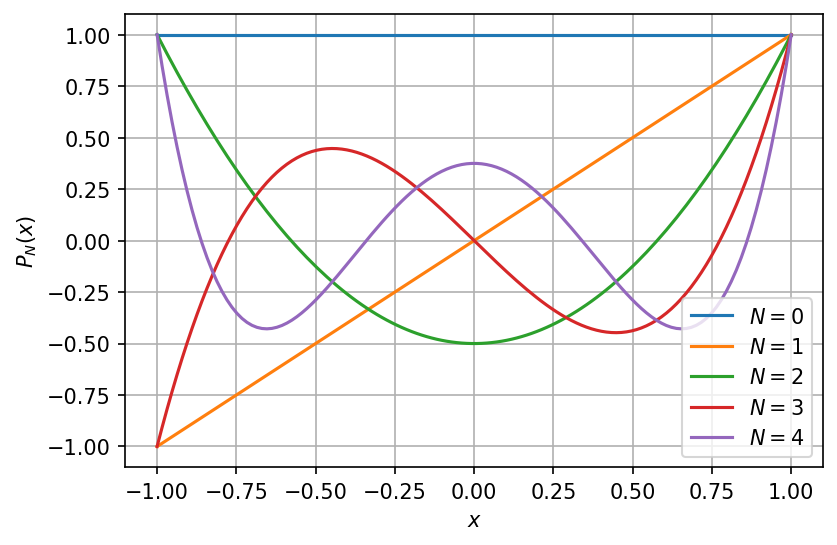

In [6]:
plot_legendre(4)

Remarkably, there is a universal rule to choose the $w_k$ and $x_k$:
* $x_k = $ roots of $N^{\text{th}}$ Legendre polynomial $P_N(x)$.
* $\displaystyle w_k = \left[\frac{2}{1-x^2}\left(\frac{dP_N}{dx}\right)^{-2}\right]_{x={x_k}}$, while $P_N(x_k)=0$.
* Tables exist to find these values.
    Newman mentions Abramowitz and Stegun, whose book was replaced long ago by NIST's Digital Library for Mathematical Functions. 
    For Gauss quadrature, see https://dlmf.nist.gov/3.5#v

* That there is such a universal rule is beautiful (see Appendix C of textbook; and in a few slides).
    In the context of this course, we'll just accept that it works.
* Don’t even write your own program to find sample points and weights: use given subroutines. We will have some practice next week on how to find zeros of a function. But for now...
* You have 
    * `gaussxw.py` for integration limits from $-1$ to $+1$,
    * `gaussxwab.py` for integration limits from $a$ to $b$.
* The calculation of weights and points is expensive. Use `gaussxw.py` if you are going to change the integration bounds repeatedly (and see end of §5.6.1, pp. 167-168, for how to do).

In [9]:
# %load gaussxw
from pylab import *
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


In [11]:
# manipulate gaussxw
N = 4 
gaussxw(N)  # change the argument of the function 

(array([ 0.86113631,  0.33998104, -0.33998104, -0.86113631]),
 array([0.34785485, 0.65214515, 0.65214515, 0.34785485]))

In [12]:
gaussxw(N)[0]  # 

array([ 0.86113631,  0.33998104, -0.33998104, -0.86113631])

In [14]:
# We can reproduce Newman's figure 5.4 with his code 
def plot_gaussxw(N):
    plt.figure(dpi=150)
    plt.bar(gaussxw(N)[0], gaussxw(N)[1], width=0.02)
    plt.grid()
    plt.title("For $N = {}$".format(N))
    plt.xlabel('position $x$')
    plt.ylabel('weight $w_k$')

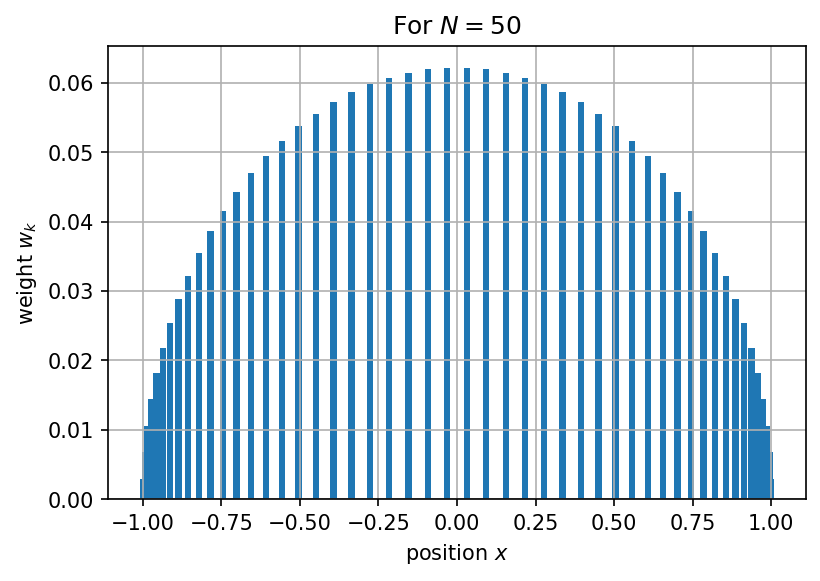

In [16]:
plot_gaussxw(50)  # Newman's figure 5.4 is with N=10 and 50

**Pros**
* complicated error formula, but in general: approximation error improves by a factor $c/N^2$ when you increase # of sample points by 1!
* e.g., going form $N=10$ to $N=11$ sample points improves your estimate by a factor of $\sim 100$ $\Rightarrow$ converge very quickly to true value of the integral.

**Cons**
* only works well if function is reasonably smooth (since sample points are farther apart),
* really hard to get an accurate estimate of the error, if needed.

### Example:

Compute $\displaystyle \int_{-1}^{1} \left[x^4 + \sin(x^2)\right]dx$ using Gaussian quadrature.

Let's see what is going on with sympy, Python's symbolic math package:

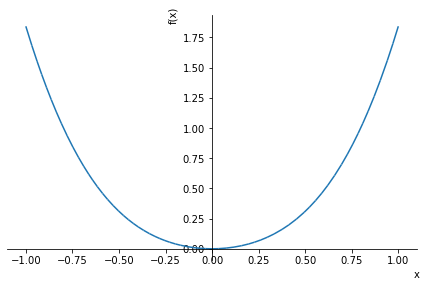

In [17]:
from sympy import *
init_printing()
x = symbols('x', real=True)
f = x**4 + sin(x**2)
plotting.plot(f, (x, -1, 1))  # plotting is part of SymPy

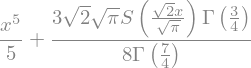

In [18]:
# Integrate f
integrate(f, x)

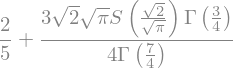

In [19]:
# from -1 to +1
res=integrate(f, (x, -1, +1))
res

In [20]:
# Numerical evaluation
N(res)

Now, we could do this as long as the function has an analytical expression that SymPy (or Maple, Mathematica, Wolfram Alpha...) knows how to solve.

Gaussian quadrature is more reliable for arbitrary functions, let's try.

In [ ]:
# This cell for pseudo-code
# NOTE HOW I KEEP IT AS A SEPARATE BLOCK OF CODE
# Load Newman's functions for gaussxw
# Load numpy, matplotlib...
# define function to integrate
# define N
# call gaussxw for xi, wi
# initialize integral to 0.
# loop over sample points to compute integral
# print

In [23]:
# This cell for code
# Load Newman's functions for gaussxw
# Load numpy
import gaussxw as gsx
import numpy as np
# define function
def f(x):
    return x**4 + np.sin(x**2)

# define N
N = 10
# call gausswx for xi, wi
x, w = gsx.gaussxw(N)

# initialize integral to 0.
I = 0.
# loop over sample points to compute integral
for k in range(N):
    I += w[k]*f(x[k])
# print
print(I)

1.020536603446779


Analytical result was 1.0205366034467

Not bad, right? Only $N=10$!

### Derivation outline

(*will not cover in class*)

Appendix C of Newman:
* Use the fact that 
    $$\forall k\in\{0, \dots N-1\}, \quad \int_{-1}^1 x^kP_N(x)dx = 0$$
    and
    $$\int_{-1}^1 [P_N(x)]^2dx = \frac{2}{2N+1}.$$
* Suppose $f(x) = A_{2N-1} x^{2N-1} + A_{2N-2}x^{2N-2} + \dots + A_0$ is a decent approximation, and divide by $P_N(x)$:
    $$f(x) = q(x)P_N(x) + r(x),$$
    with $q$, $r$ polynomials of order $N-1$.
    

* Therefore, 
    $$\int_{-1}^1 f(x)dx \approx \sum_{k=1}^N w_k f(x_k) \\
    = \sum_{k=1}^N w_k q(x_k)P_N(x_k) + \sum_{k=1}^N w_k r(x_k)$$
* Choose $x_k$'s such that $P_N(x_k) = 0$ (roots)
    $$\Rightarrow\ \int_{-1}^1 f(x)dx \approx \sum_{k=1}^N w_k r(x_k),$$
    i.e., as accurate as integrating a polynomial of order $N-1$.
* No loss of information, because "encoded" in the $(x_k, w_k)$'s.

# Numerical derivatives

* Simpler than numerical integration, in  a way.
* Computing errors is usually a doozey though.
* Based on Taylor series approximations.
* Use Taylor series approximations to estimate errors.


1. Forward difference approximation: $\displaystyle f'(x) \approx \frac{f(x+h) - f(x)}{h}$,
2. Backward difference approximation: $\displaystyle f'(x) \approx \frac{f(x) - f(x-h)}{h}$,


## Basic philosophy for error estimation

Use Taylor series to find error in these approximations:
$$ f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + h.o.t.$$
Isolate for $f'(x)$:
$$f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}2 f''(x) + h.o.t.$$
$\Rightarrow$ error is 1st-order in $h$ (same is true for backward difference method).

## Central differences

* Using Taylor series to find sneaky improvements to finite difference (FD) schemes.
* Example: central FD method:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}.$$
* Notice it still only involves subtracting 2 points, it's just that the location of the 2 points is different.

* Error:
$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + h.o.t.$$
$$f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + h.o.t.$$

* Substract:
$$ f(x+h) - f(x+h) = 2hf'(x) + \frac{h^3}{3}f'''(x) + h.o.t.$$
* Isolate for $f'(x)$ and add:
$$f'(x) = \frac{f(x+h) - f(x-h)}{2h} - \boxed{\frac{h^2}{6}f'''(x)} + h.o.t.$$

* So we see that this formula is accurate to 2nd order in $h$.
* Can get higher-order methods by including more points (see table 5.1 on page 196).
* Might have to do different things near the boundaries.
* Partial derivatives: similar techniques.
* Higher order derivatives (e.g., $f''$): similar techniques.

## Roundoff error, a comeback

* Let’s take another look at this formula:
$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + h.o.t.$$
* What happens when we consider roundoff error? Recall that substracting numbers that are close is dangerous!
* Each of the terms $f(x+h)$ and $f(x)$ have error $\sim C|f(x)|$. Their difference will have approximate error $2Cf(x)$ (worst case scenario).
* So in fact there are two sources of error and this leads to (eqn. (5.91) in book):
$$\epsilon = \underbrace{\frac{2C|f(x)|}{h}}_{\text{round-off error}} + \underbrace{\frac{1}{2}h |f''(x)| + h.o.t.}_{\text{approximation error}}$$

* Factor $1/h \Rightarrow$ increasing $N$ could increase the error.
* The error has a minimum when $h$ satisfies
$$h = \sqrt{4C\left|\frac{f(x)}{f''(x)}\right|} \qquad (5.93).$$
(*Note: $x$ is not a variable in this discussion. $f(x)$ should be interpreted as the typical magnitude of $f$.*)
* Example: $f(x), f''(x) = O(1) \Rightarrow h\sim O(\sqrt{C}) = O(10^{-8})$. In this case, the error is $\epsilon = O(10^{-8})$, from
$$\epsilon = h|f''(x)| = \sqrt{4C \left|f(x)f''(x)\right|} \qquad (5.94).$$
* There are two points: there's a limit to the improvement you can obtain by going to finer resolution, and the precision expected on differentiation is orders of magnitude less than that of other operations we have discussed.

# Summary

## Integrals

### Newton-Cotes formulas

* Like Riemann, Trapezoidal and Simpson's rule, but with arbitrary order.
* Recall from last week: Euler-MacLaurin and practical estimations of errors work
* Your can compute the coefficients for each, but you might as well use tables (chances are, you'll never go beyond Simpson)

### Gaussian quadrature

* Unlike Newton-Cotes, the points of integration are not equally-spaced
* How to find weights and sample points: use routines, know that there are properties of Legendre polynomials under the hood
* Every time $N$ increase by $1$, error multiplied by $\propto 1/N^2$: very accurate

## Derivatives

* Taylor expansions give formulas **and** error estimates.
* Different orders of accuracy as we refine our use of Taylor expansions
* Not the only error! As $h$ goes down, approximation error goes down, but machine precision error goes up! (relatively speaking) 